# Laboratorio 03 -> Familias de Malware

##### Universidada del Valle de Guatemala

##### Luis Pedro Cuéllar - 18220

### Parte I --> Creación del dataset

In [1]:
import os
import glob
import pefile
import hashlib
import numpy as np
import pandas as pd

In [2]:
path = "MALWR/*"

all_files = glob.glob(path)
all_files

['MALWR/JH78C0A33A1B472A8C16123FD696A5CE5EBB',
 'MALWR/NBV_8B75BCBFF174C25A0161F30758509A44',
 'MALWR/POL55_A4F1ECC4D25B33395196B5D51A06790',
 'MALWR/6FAA4740F99408D4D2DDDD0B09BBDEFD',
 'MALWR/A316D5AECA269CA865077E7FFF356E7D',
 'MALWR/650A6FCA433EE243391E4B4C11F09438',
 'MALWR/QW2_4C6BDDCCA2695D6202DF38708E14FC7E',
 'MALWR/AAAz2E1B6940985A23E5639450F8391820655',
 'MALWR/RTC_7F85D7F628CE62D1D8F7B39D8940472',
 'MALWR/1F2EB7B090018D975E6D9B40868C94CA',
 'MALWR/B07322743778B5868475DBE66EEDAC4F',
 'MALWR/PL98_BD8B082B7711BC980252F988BB0CA936',
 'MALWR/DS22_A670D13D4D014169C4080328B8FEB86',
 'MALWR/GBV66_8F259BB36E00D124963CFA9B86F502E',
 'MALWR/65018CD542145A3792BA09985734C12A',
 'MALWR/33DE5067A433A6EC5C328067DC18EC37',
 'MALWR/VC990_468FF2C12CFFC7E5B2FE0EE6BB3B239E',
 'MALWR/VBMM9_149B7BD7218AAB4E257D28469FDDB0D',
 'MALWR/JKK8CA6FE7A1315AF5AFEAC2961460A80569',
 'MALWR/K99_C3A9A7B026BFE0E55FF219FD6AA7D94',
 'MALWR/BVJ2D9FBF759F527AF373E34673DC3ACA462',
 'MALWR/FHHH6576C196385407B0F7F4B1B5

#### Sacamos los valores con un solo archivo previo a hacer el dataset final

In [3]:
## Cargamos el archivo usando pefile
file = pefile.PE('MALWR/JH78C0A33A1B472A8C16123FD696A5CE5EBB')
file

In [4]:
fh = open('MALWR/JH78C0A33A1B472A8C16123FD696A5CE5EBB', "rb")
data = fh.read()
fh.close()

In [5]:
## Obtenemos el sha256 del archivo
sha256 = hashlib.sha256(data).hexdigest()
sha256

'5566759631e5eaa2833057a5a57caa31837ddee65873868d33ea908e61d86b5a'

In [6]:
## Obtenemos el MD5 Hash  del Import Address Table
file.get_imphash()

'f38b47f590d64b94e8c6f277d7fb7869'

##### Empezamos a explorar el archivo

In [7]:
file.print_info()

----------Parsing Warnings----------

Suspicious flags set for section 0. Both IMAGE_SCN_MEM_WRITE and IMAGE_SCN_MEM_EXECUTE are set. This might indicate a packed executable.

Suspicious flags set for section 1. Both IMAGE_SCN_MEM_WRITE and IMAGE_SCN_MEM_EXECUTE are set. This might indicate a packed executable.

Imported symbols contain entries typical of packed executables.

----------DOS_HEADER----------

[IMAGE_DOS_HEADER]
0x0        0x0   e_magic:                       0x5A4D    
0x2        0x2   e_cblp:                        0x90      
0x4        0x4   e_cp:                          0x3       
0x6        0x6   e_crlc:                        0x0       
0x8        0x8   e_cparhdr:                     0x4       
0xA        0xA   e_minalloc:                    0x0       
0xC        0xC   e_maxalloc:                    0xFFFF    
0xE        0xE   e_ss:                          0x0       
0x10       0x10  e_sp:                          0xB8      
0x12       0x12  e_csum:               

DOS Header

In [8]:
print("e_magic --> " + hex(file.DOS_HEADER.e_magic))
print("e_lfnwe --> " + hex(file.DOS_HEADER.e_lfanew))

e_magic --> 0x5a4d
e_lfnwe --> 0xe0


PE Header

In [9]:
## Del NT_HEADER obtenemos el "Signature"
print("Signature --> " + hex(file.NT_HEADERS.Signature))

Signature --> 0x4550


File Header

In [10]:
## Nos indica la arquitectura del binario
machine = file.FILE_HEADER.Machine
machine

332

In [12]:
## Obtenemos la fecha 
file.FILE_HEADER.dump_dict()['TimeDateStamp']['Value'].split('[')[1][:-1]

'Thu May 14 17:12:40 2009 UTC'

In [11]:
## Obtenemos el número de section headers
file.FILE_HEADER.NumberOfSections

3

In [13]:
## Obtenemos el número de características del archivo PE
file.FILE_HEADER.Characteristics

271

Optional Header

In [14]:
## Obtenemos el valor que interpretaría la arcquitectura del archivo
file.OPTIONAL_HEADER.Magic

267

In [15]:
## Especifica la dirección de memoria preferido donde el binario tendría que iniciar
file.OPTIONAL_HEADER.ImageBase

4194304

In [16]:
file.OPTIONAL_HEADER.SectionAlignment

4096

In [17]:
## Tamaño de la imagen del archivo
file.OPTIONAL_HEADER.SizeOfImage

32768

In [18]:
## Tamaño del "bloque" que se crearía si este programa escribiera información
file.OPTIONAL_HEADER.FileAlignment

512

In [19]:
## Características Dll
file.OPTIONAL_HEADER.DllCharacteristics

0

##### Sacamos las mismas features pero para cada uno de los archivos

In [20]:
columns_name = [
    "file_name", 
    "sha256", 
    "imphash", 
    "e_magic", 
    "e_lfnew", 
    "signature", 
    "machine", 
    "timestamp", 
    "sections", 
    "characteristics",
    "magic",
    "image_base",
    "section_alignment", 
    "size_of_image",
    "file_alignment",
    "dll_characteristics"
]

In [21]:
dataset = []

In [22]:
for file in all_files:
    file_data = []
    
    sha256 = ""
    imphash = ""
    e_magic = ""
    e_lfanew = ""
    signature = "" 
    machine = ""
    timestamp = ""
    sections = ""
    characteristics = ""
    magic = ""
    image_base = ""
    section_alignment = ""
    size_of_image = ""
    file_alignment = ""
    dll_characteristics = ""
        
    x = pefile.PE(file)
    
    fh = open(file, "rb")
    data = fh.read()
    fh.close()
    
    sha256 = hashlib.sha256(data).hexdigest()
    imphash = x.get_imphash()
    
    e_magic = hex(x.DOS_HEADER.e_magic)
    e_lfnew = hex(x.DOS_HEADER.e_lfanew)
    
    signature = hex(x.NT_HEADERS.Signature)
    
    machine = x.FILE_HEADER.Machine
    timestamp = x.FILE_HEADER.dump_dict()['TimeDateStamp']['Value'].split('[')[1][:-1]
    
    sections = x.FILE_HEADER.NumberOfSections
    characteristics = x.FILE_HEADER.Characteristics
    
    magic = x.OPTIONAL_HEADER.Magic
    image_base = x.OPTIONAL_HEADER.ImageBase
    section_alignment = x.OPTIONAL_HEADER.SectionAlignment
    size_of_image = x.OPTIONAL_HEADER.SizeOfImage
    file_alignment = x.OPTIONAL_HEADER.FileAlignment
    dll_characteristics = x.OPTIONAL_HEADER.DllCharacteristics
    
    file_data = [
        file.split("/")[1],
        sha256,
        imphash,
        e_magic,
        e_lfanew,
        signature,
        machine,
        timestamp,
        sections,
        characteristics,
        magic,
        image_base,
        section_alignment,
        size_of_image,
        file_alignment,
        dll_characteristics
    ]
    
    dataset.append(file_data)

In [23]:
dataset

[['JH78C0A33A1B472A8C16123FD696A5CE5EBB',
  '5566759631e5eaa2833057a5a57caa31837ddee65873868d33ea908e61d86b5a',
  'f38b47f590d64b94e8c6f277d7fb7869',
  '0x5a4d',
  '',
  '0x4550',
  332,
  'Thu May 14 17:12:40 2009 UTC',
  3,
  271,
  267,
  4194304,
  4096,
  32768,
  512,
  0],
 ['NBV_8B75BCBFF174C25A0161F30758509A44',
  'aa5cb0e2aab4b8544d43fdf1f26db234c2039caaddb412d6bb65905b0ceb6a65',
  'f38b47f590d64b94e8c6f277d7fb7869',
  '0x5a4d',
  '',
  '0x4550',
  332,
  'Thu May 14 17:12:40 2009 UTC',
  3,
  271,
  267,
  4194304,
  4096,
  32768,
  512,
  0],
 ['POL55_A4F1ECC4D25B33395196B5D51A06790',
  '57ef37c30a4a10b334a745d2f6235b4703ae99cf8e64e11b5bf66600c3d5bd6f',
  '4d333650666fecf3482501fc120e6226',
  '0x5a4d',
  '',
  '0x4550',
  332,
  'Fri Jul 29 07:10:31 2011 UTC',
  3,
  271,
  267,
  4194304,
  4096,
  4030464,
  512,
  0],
 ['6FAA4740F99408D4D2DDDD0B09BBDEFD',
  '41e14883b3a545de6c34c1f14d3856d0e070af9aee7d3b09dbb57552934cede4',
  'f38b47f590d64b94e8c6f277d7fb7869',
  '0x5a4

In [75]:
df = pd.DataFrame(
    dataset,
    columns = columns_name
)

In [76]:
df.head()

,file_name,sha256,imphash,e_magic,e_lfnew,signature,machine,timestamp,sections,characteristics,magic,image_base,section_alignment,size_of_image,file_alignment,dll_characteristics
0,JH78C0A33A1B472A8C16123FD696A5CE5EBB,5566759631e5eaa2833057a5a57caa31837ddee6587386...,f38b47f590d64b94e8c6f277d7fb7869,0x5a4d,,0x4550,332,Thu May 14 17:12:40 2009 UTC,3,271,267,4194304,4096,32768,512,0
1,NBV_8B75BCBFF174C25A0161F30758509A44,aa5cb0e2aab4b8544d43fdf1f26db234c2039caaddb412...,f38b47f590d64b94e8c6f277d7fb7869,0x5a4d,,0x4550,332,Thu May 14 17:12:40 2009 UTC,3,271,267,4194304,4096,32768,512,0
2,POL55_A4F1ECC4D25B33395196B5D51A06790,57ef37c30a4a10b334a745d2f6235b4703ae99cf8e64e1...,4d333650666fecf3482501fc120e6226,0x5a4d,,0x4550,332,Fri Jul 29 07:10:31 2011 UTC,3,271,267,4194304,4096,4030464,512,0
3,6FAA4740F99408D4D2DDDD0B09BBDEFD,41e14883b3a545de6c34c1f14d3856d0e070af9aee7d3b...,f38b47f590d64b94e8c6f277d7fb7869,0x5a4d,,0x4550,332,Thu May 14 17:12:40 2009 UTC,3,271,267,4194304,4096,32768,512,0
4,A316D5AECA269CA865077E7FFF356E7D,ea405f3a14b77297f8b15348a83b1680e72412adc1653d...,f38b47f590d64b94e8c6f277d7fb7869,0x5a4d,,0x4550,332,Thu May 14 17:12:40 2009 UTC,3,271,267,4194304,4096,32768,512,0


In [77]:
df['imphash'].unique

<bound method Series.unique of 0     f38b47f590d64b94e8c6f277d7fb7869
1     f38b47f590d64b94e8c6f277d7fb7869
2     4d333650666fecf3482501fc120e6226
3     f38b47f590d64b94e8c6f277d7fb7869
4     f38b47f590d64b94e8c6f277d7fb7869
5     f38b47f590d64b94e8c6f277d7fb7869
6     86312c57725053eb45f35b86940bf9fa
7     7ebcf30b922eb06614e711c9c73ea596
8     c173b98d9f06e15252148babfabe3eff
9     04410a44d0c93650cd71d40aa75bde78
10    04410a44d0c93650cd71d40aa75bde78
11    7ebcf30b922eb06614e711c9c73ea596
12    4d333650666fecf3482501fc120e6226
13    4d333650666fecf3482501fc120e6226
14    f38b47f590d64b94e8c6f277d7fb7869
15    f38b47f590d64b94e8c6f277d7fb7869
16    74171982478bac87316f0bf41baf6928
17    c173b98d9f06e15252148babfabe3eff
18    f38b47f590d64b94e8c6f277d7fb7869
19    4d333650666fecf3482501fc120e6226
20    f38b47f590d64b94e8c6f277d7fb7869
21    f38b47f590d64b94e8c6f277d7fb7869
22    7ebcf30b922eb06614e711c9c73ea596
23    bd7666a537d966cd0a0fc4d40ddd9aec
24    f38b47f590d64b94e8c6f277d7f

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   file_name            40 non-null     object
 1   sha256               40 non-null     object
 2   imphash              40 non-null     object
 3   e_magic              40 non-null     object
 4   e_lfnew              40 non-null     object
 5   signature            40 non-null     object
 6   machine              40 non-null     int64 
 7   timestamp            40 non-null     object
 8   sections             40 non-null     int64 
 9   characteristics      40 non-null     int64 
 10  magic                40 non-null     int64 
 11  image_base           40 non-null     int64 
 12  section_alignment    40 non-null     int64 
 13  size_of_image        40 non-null     int64 
 14  file_alignment       40 non-null     int64 
 15  dll_characteristics  40 non-null     int64 
dtypes: int64(9

In [124]:
pefile = df.drop(["timestamp", "file_name", "sha256", "imphash"], 1)

/var/folders/kh/vcfbrgzs4d34zw7_9vlbmc780000gn/T/ipykernel_734/636594498.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  pefile = df.drop(["timestamp", "file_name", "sha256", "imphash"], 1)


In [125]:
dummies = pd.get_dummies(pefile, columns = ["e_magic", "e_lfnew", "signature"])

In [126]:
dummies.head()

,machine,sections,characteristics,magic,image_base,section_alignment,size_of_image,file_alignment,dll_characteristics,e_magic_0x5a4d,e_lfnew_,signature_0x4550
0,332,3,271,267,4194304,4096,32768,512,0,1,1,1
1,332,3,271,267,4194304,4096,32768,512,0,1,1,1
2,332,3,271,267,4194304,4096,4030464,512,0,1,1,1
3,332,3,271,267,4194304,4096,32768,512,0,1,1,1
4,332,3,271,267,4194304,4096,32768,512,0,1,1,1


### Parte II --> Implementación del Modelo

In [118]:
from sklearn.preprocessing import StandardScaler

In [121]:
scaler = StandardScaler()

In [132]:
scaled = sscaler.fit_transform(dummies)

In [128]:
from sklearn import cluster

In [141]:
k_means = cluster.KMeans(
    init= "k-means++",
    n_clusters = 4,
    random_state = 14 
)

In [142]:
k_means.fit(scaled)

KMeans(n_clusters=4, random_state=14)

/var/folders/kh/vcfbrgzs4d34zw7_9vlbmc780000gn/T/ipykernel_734/1665585257.py:13: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kms.fit(scaled)
/var/folders/kh/vcfbrgzs4d34zw7_9vlbmc780000gn/T/ipykernel_734/1665585257.py:13: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kms.fit(scaled)


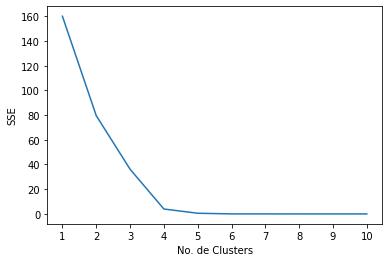

In [143]:
kmeans_kwargs = {
}

sse = []

for k in range(1, 11):
    kms = cluster.KMeans(
        n_clusters = k,
        init = "k-means++",
        max_iter = 500,
        random_state = 14,
    )
    kms.fit(scaled)
    sse.append(kms.inertia_)
    
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("No. de Clusters")
plt.ylabel("SSE")
plt.show()

In [139]:
from sklearn.metrics import silhouette_score


/var/folders/kh/vcfbrgzs4d34zw7_9vlbmc780000gn/T/ipykernel_734/3467947740.py:10: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kms.fit(scaled)
/var/folders/kh/vcfbrgzs4d34zw7_9vlbmc780000gn/T/ipykernel_734/3467947740.py:10: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kms.fit(scaled)


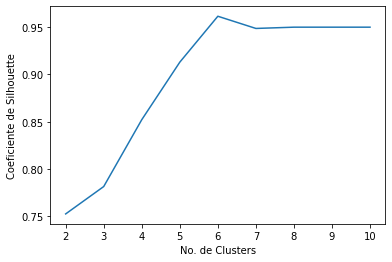

In [144]:
coef_silhouette = []

for k in range(2, 11):
    kms = cluster.KMeans(
        n_clusters=k,
        init = "k-means++",
        max_iter = 500,
        random_state = 14,
    )
    kms.fit(scaled)
    score = silhouette_score(scaled, kms.labels_)
    coef_silhouette.append(score)
    

plt.plot(range(2, 11), coef_silhouette)
plt.xticks(range(2, 11))
plt.xlabel("No. de Clusters")
plt.ylabel("Coeficiente de Silhouette")
plt.show()